<a href="https://colab.research.google.com/github/bobovnii/progressive_growing_of_gans/blob/master/GANs_Progressive_Growing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
 drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls /gdrive/My\ Drive/

 20190309_164855.mp4	       JDAtask			 Web.gdoc
'Anyfile Notepad Files'        두산위브.png		 Web.pdf
'Bd дед'		      'Table SUSY.gsheet'	 Архиватор
'Colab Notebooks'	       VID_20160304_131122.3gp	 бобовников.xps
'Day One Backups'	       VID_20171005_101438.3gp	 Коллаж
 Erice-CMS-ATLAS.PJ.IMP.gdoc  'Web (1).pdf'
 GAN_exercises		       Web.docx


In [0]:
!pwd

/gdrive/My Drive/Colab Notebooks/GAN/progressive_growing_of_gans


In [0]:
import os
os.chdir("/gdrive/My Drive/Colab Notebooks/GAN/progressive_growing_of_gans")

In [0]:
!git clone https://github.com/bobovnii/progressive_growing_of_gans.git

Cloning into 'progressive_growing_of_gans'...
remote: Enumerating objects: 155, done.
remote: Total 155 (delta 0), reused 0 (delta 0), pack-reused 155
Receiving objects: 100% (155/155), 350.22 KiB | 8.34 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [0]:
!ls

 config.py				      misc.py
 dataset				      networks.py
 dataset.py				      __pycache__
 dataset_tool.py			      README.md
 img_align_celeba_png			      representative_image_512x256.png
'karras2018iclr-celebahq-1024x1024 (1).pkl'   requirements-pip.txt
 karras2018iclr-celebahq-1024x1024.pkl	      results
 karras2018iclr-lsun-airplane-256x256.pkl     testPictures
 legacy.py				      tfutil.py
 LICENSE.txt				      train.py
 loss.py				      util_scripts.py
 metrics


In [0]:
#pip install -r requirements-pip.txt

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
import pickle
import numpy as np
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import PIL.Image

# Initialize TensorFlow session.
tf.InteractiveSession()

# Import official CelebA-HQ networks.
with open('karras2018iclr-celebahq-1024x1024.pkl', 'rb') as file:
    G, D, Gs = pickle.load(file)

In [0]:
# Generate latent vectors.
latents = np.random.RandomState(1000).randn(1000, *Gs.input_shapes[0][1:]) # 1000 random latents
latents = latents[[477, 56, 83, 887, 583, 391, 86, 340, 341, 415]] # hand-picked top-10

In [0]:
# Generate dummy labels (not used by the official networks).
labels = np.zeros([latents.shape[0]] + Gs.input_shapes[1][1:])

In [0]:
# Run the generator to produce a set of images.
images = Gs.run(latents, labels)

In [0]:
# Convert images to PIL-compatible format.
images = np.clip(np.rint((images + 1.0) / 2.0 * 255.0), 0.0, 255.0).astype(np.uint8) # [-1,1] => [0,255]
images = images.transpose(0, 2, 3, 1) # NCHW => NHWC

In [0]:
# Save images as PNG.
for idx in range(images.shape[0]):
    PIL.Image.fromarray(images[idx], 'RGB').save('img%d.png' % idx)

In [0]:
import config
import tfutil
#import dataset
#import dataset_tool 
import pickle


In [0]:
!mkdir dataset

In [0]:
!ls ./../../dataset/CelebA

Anno  Eval  Img  README.txt


In [0]:
!python dataset_tool.py create_celeba dataset/CelebA ./../../dataset/CelebA

Loading CelebA from "./../../dataset/CelebA"
Error: Expected to find 51333 images


In [5]:
!python dataset_tool.py create_from_images fear fearfinalPictures

Loading images from "fearfinalPictures"
Creating dataset "fear"



Added 2420 images.


In [4]:
!mkdir fear

mkdir: cannot create directory ‘fear’: File exists


In [0]:
!ls ./../../dataset/CelebA/Img/img_align_celeba_png.7z/

img_align_celeba_png.7z.001  img_align_celeba_png.7z.009
img_align_celeba_png.7z.002  img_align_celeba_png.7z.010
img_align_celeba_png.7z.003  img_align_celeba_png.7z.011
img_align_celeba_png.7z.004  img_align_celeba_png.7z.012
img_align_celeba_png.7z.005  img_align_celeba_png.7z.013
img_align_celeba_png.7z.006  img_align_celeba_png.7z.014
img_align_celeba_png.7z.007  img_align_celeba_png.7z.015
img_align_celeba_png.7z.008  img_align_celeba_png.7z.016


In [0]:
!7z x ./../../dataset/CelebA/Img/img_align_celeba_png.7z/img_align_celeba_png.7z.001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./../../dataset/CelebA/Img/img_align_celeba_png.7z/                                                             1 file, 734003200 bytes (700 MiB)

Extracting archive: ./../../dataset/CelebA/Img/img_align_celeba_png.7z/img_align_celeba_png.7z.001
  0% 1 Open           --
Path = ./../../dataset/CelebA/Img/img_align_celeba_png.7z/img_align_celeba_png.7z.001
Type = Split
Physical Size = 734003200
Volumes = 16
Total Physical Size = 11586962073
----
Path = img_align_celeba_png.7z
Size = 11586962073
--
Path = img_align_celeba_png.7z
Type = 7z
Physical Size = 11586962073
Headers Size = 1977786
Method = LZMA:24
Solid

In [0]:
!ls

config.py	      LICENSE.txt  README.md
dataset		      loss.py	   representative_image_512x256.png
dataset.py	      metrics	   requirements-pip.txt
dataset_tool.py       misc.py	   tfutil.py
img_align_celeba_png  networks.py  train.py
legacy.py	      __pycache__  util_scripts.py


In [0]:
!pwd

/gdrive/My Drive/Colab Notebooks/GAN/progressive_growing_of_gans/img_align_celeba_png


In [0]:
ls img_align_celeba_png/ | wc -l 

ls: cannot open directory 'img_align_celeba_png/': Input/output error
0


In [0]:
os.chdir("img_align_celeba_png/")

In [0]:
!ls *.png| wc -l

ls: cannot access '*.png': Input/output error
0


In [0]:
!python dataset_tool.py create_celeba dataset/CelebA /gdrive/My\ Drive/Colab\ Notebooks/GAN/progressive_growing_of_gans/

Loading CelebA from "/gdrive/My Drive/Colab Notebooks/GAN/progressive_growing_of_gans/"
Creating dataset "dataset/CelebA"
W0722 19:41:32.339983 140443047040896 deprecation_wrapper.py:119] From dataset_tool.py:71: The name tf.python_io.TFRecordOptions is deprecated. Please use tf.io.TFRecordOptions instead.

W0722 19:41:32.340302 140443047040896 deprecation_wrapper.py:119] From dataset_tool.py:71: The name tf.python_io.TFRecordCompressionType is deprecated. Please use tf.compat.v1.python_io.TFRecordCompressionType instead.

W0722 19:41:32.340493 140443047040896 deprecation_wrapper.py:119] From dataset_tool.py:74: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.

Added 6355 images.
Traceback (most recent call last):
  File "dataset_tool.py", line 738, in <module>
    execute_cmdline(sys.argv)
  File "dataset_tool.py", line 733, in execute_cmdline
    func(**vars(args))
  File "dataset_tool.py", line 447, in create_celeba
    assert img.shape ==

In [0]:
import glob
aaa = sorted(glob.glob(os.path.join('/gdrive/My Drive/Colab Notebooks/GAN/progressive_growing_of_gans/img_align_celeba_png', '*')))
len(aaa)

51333

In [3]:
import numpy as np
import tensorflow as tf
import PIL.Image

In [0]:
    img = np.asarray(PIL.Image.open(aaa[0]))
    resolution = img.shape[0]
    channels = img.shape[2] if img.ndim == 3 else 1
    img.shape[0]
    img.shape[1] 

178

In [0]:
!python dataset_tool.py extract dataset/CelebA/ testPictures

In [0]:
!mkdir testPictures

In [0]:
#training


!python train.py

Initializing TensorFlow...




2019-11-27 10:09:44.547646: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Running train.train_progressive_gan()...
Streaming data using dataset.TFRecordDataset...


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.
Dataset shape = [3, 512, 512]
Dynamic range = [0, 255]
Label size    = 0
Const

In [0]:
#pictures preprocessing
import tensorflow as tf

def crop_center_and_resize(img, size):
    s = tf.shape(img)
    w, h = s[0], s[1]
    c = tf.minimum(w, h)
    wn, hn = h / c, w / c
    result = tf.image.crop_and_resize(tf.expand_dims(img, 0),
                                      [[(1 - wn) / 2, (1 - hn) / 2, wn, hn]],
                                      [0], [size, size])
    return tf.squeeze(result, 0)

In [0]:
!ls finalPictures/fear_17.jpeg

finalPictures/fear_17.jpeg


In [0]:
# images preprocessing

In [0]:


import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
import os
import sys
import glob
import argparse
import threading
import six.moves.queue as Queue
import traceback
import numpy as np
import tensorflow as tf
import PIL.Image

import tfutil
import dataset

In [0]:
def crop_center_and_resize(img, size):
    s = tf.shape(img)
    w, h = s[0], s[1]
    c = tf.minimum(w, h)
    w_start = (w - c) // 2
    h_start = (h - c) // 2
    #print(h_start)
    center = img[w_start:w_start + c, h_start:h_start + c]
    return tf.image.resize_images(center, [size, size])

In [0]:
image_filenames = sorted(glob.glob(os.path.join('finalPictures', 'fear_*')))

In [0]:
!rm finalPictures/fear_3*.jpeg

In [0]:
!ls -d fearfinalPictures

fearfinalPictures


In [0]:
i=0
for filename in image_filenames:
  print(filename)
  img = np.asarray(PIL.Image.open(image_filenames[i]).convert('RGB'))
  newImg = tf.convert_to_tensor(img)
  check = crop_center_and_resize(newImg, 512)

  with tf.Session() as sess:
    newImg2 = sess.run(check)
    newImg3 = sess.run(tf.dtypes.cast(newImg2, tf.uint8))
    #new3 = sess.run(newImg)
  
  im = Image.fromarray(newImg3)
  im.save("fear"+filename)
  i=i+1



finalPictures/fear_4.jpeg
finalPictures/fear_4000.jpeg
finalPictures/fear_4003.jpeg
finalPictures/fear_4007.jpeg
finalPictures/fear_4008.jpeg
finalPictures/fear_4009.jpeg
finalPictures/fear_4011.jpeg
finalPictures/fear_4013.jpeg
finalPictures/fear_4014.jpeg
finalPictures/fear_4016.jpeg
finalPictures/fear_4018.jpeg
finalPictures/fear_4019.jpeg
finalPictures/fear_4021.jpeg
finalPictures/fear_4027.jpeg
finalPictures/fear_4030.jpeg
finalPictures/fear_4032.jpeg
finalPictures/fear_4033.jpeg
finalPictures/fear_4036.jpeg
finalPictures/fear_4037.jpeg
finalPictures/fear_4041.jpeg
finalPictures/fear_4048.jpeg
finalPictures/fear_4049.jpeg
finalPictures/fear_4050.jpeg
finalPictures/fear_4051.jpeg
finalPictures/fear_4053.jpeg
finalPictures/fear_4057.jpeg
finalPictures/fear_4059.jpeg
finalPictures/fear_4063.jpeg
finalPictures/fear_4068.jpeg
finalPictures/fear_4069.jpeg
finalPictures/fear_407.jpeg
finalPictures/fear_4076.jpeg
finalPictures/fear_4080.jpeg
finalPictures/fear_4086.jpeg
finalPictures/fear

In [0]:
img = np.asarray(PIL.Image.open(image_filenames[0]))

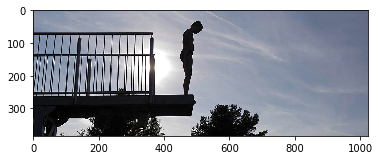

In [0]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [0]:
def crop_center_and_resize(img, size):
    s = tf.shape(img)
    w, h = s[0], s[1]
    c = tf.minimum(w, h)
    wn, hn = h / c, w / c
    result = tf.image.crop_and_resize(tf.expand_dims(img, 0),
                                      [[(1 - wn) / 2, (1 - hn) / 2, wn, hn]],
                                      [0], [size, size])
    return tf.squeeze(result, 0)

In [0]:
tf.zeros((80, 50, 3))

TensorShape([Dimension(80), Dimension(50), Dimension(3)])

In [0]:
#def crop_center_and_resize(img, size):
s = tf.shape(img)
w, h = s[0], s[1]
c = tf.minimum(w, h)
w_start = (w - c) // 2
h_start = (h - c) // 2
#c = tf.dtypes.cast(c, tf.int32)
#w_start = tf.dtypes.cast(w_start, tf.int32)
#h_start = tf.dtypes.cast(h_start, tf.int32)
#print(w_start)
#center = img[w_start:w_start + c, h_start:h_start + c]
#    return tf.image.resize_images(img, [size, size])

#img2 = crop_center_and_resize(img,500)
with tf.Session() as sess:
  print(sess.run(h_start))
  
  #img3 = sess.run(img2)

Tensor("floordiv_48:0", shape=(), dtype=int32)
224


In [0]:


sess = tf.Session()
print(sess.run(c))
sess.close()
 



In [0]:

def crop_center_and_resize(img, size):
    s = tf.shape(img)
    w, h = s[0], s[1]
    c = tf.minimum(w, h)
    w_start = (w - c) // 2
    h_start = (h - c) // 2
    print(h_start)
    center = img[w_start:w_start + c, h_start:h_start + c]
    return tf.image.resize_images(center, [size, size])

newImg = tf.convert_to_tensor(img)

check = crop_center_and_resize(newImg, 512)
with tf.Session() as sess:
    newImg2 = sess.run(check)
    newImg3 = sess.run(tf.dtypes.cast(newImg2, tf.uint8))
    #new3 = sess.run(newImg)

Tensor("floordiv_91:0", shape=(), dtype=int32)


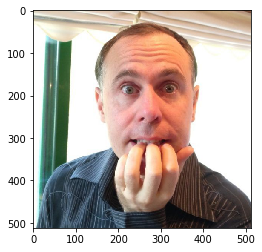

In [0]:
plt.imshow(newImg3)
plt.show()

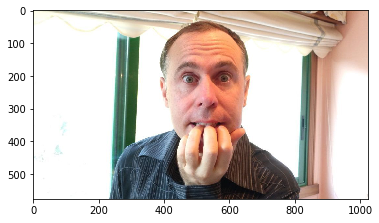

In [0]:
plt.imshow(img)
plt.show()

In [0]:
from PIL import Image
im = Image.fromarray(newImg3)
im.save("your_file2.jpeg")